<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
try:
    clients = pd.read_csv('C:/ya_pr/linal/insurance.csv')
except:
    clients = pd.read_csv('/datasets/insurance.csv')

In [3]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
clients.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
clients.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


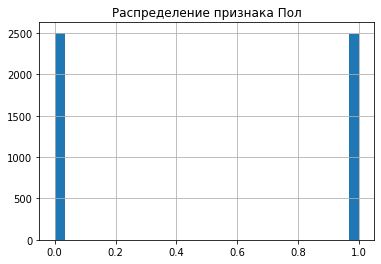

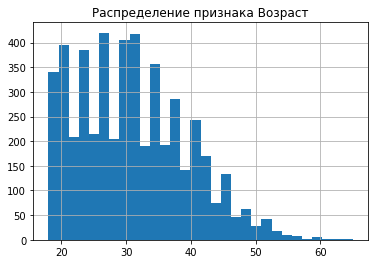

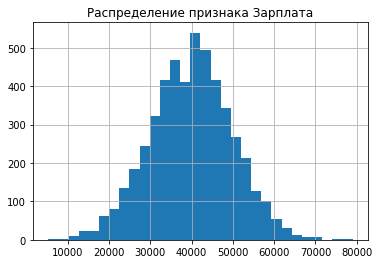

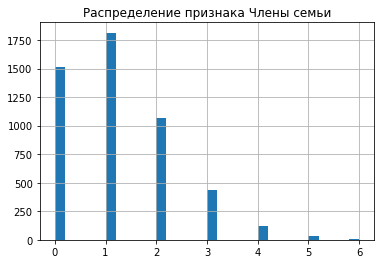

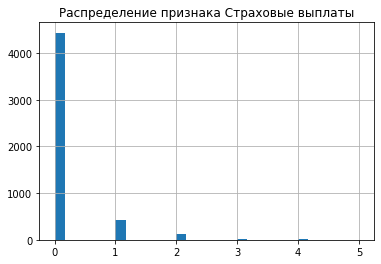

In [6]:
for column in clients.columns:
    clients[column].hist(bins=30)
    plt.title(f'Распределение признака {column}')
    plt.show()

Видим, что из пяти признаков только два ('Зарплата' и 'Возраст') являются количественными. Проверим есть ли между ними корреляция:

In [7]:
clients['Зарплата'].corr(clients['Возраст'])

-0.01909259551237576

Корреляции нет.

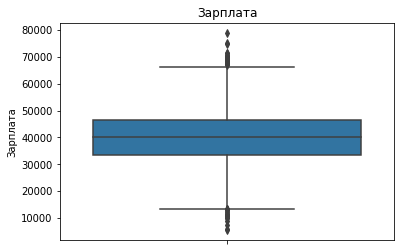

In [8]:
sns.boxplot(y=clients['Зарплата'])
plt.title('Зарплата')
plt.show()

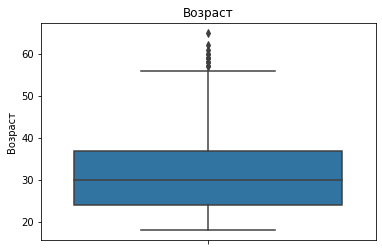

In [9]:
sns.boxplot(y=clients['Возраст'])
plt.title('Возраст')
plt.show()

Проверим есть ли выраженная взаимосвязь между категориальными признаками 'Пол', 'Члены семьи' и целевым признаком 'Страховые выплаты':

In [10]:
clients.groupby(clients['Пол']).agg(mean_payments=('Страховые выплаты','mean'))

,mean_payments
Пол,
0,0.143313
1,0.152705


In [11]:
clients.groupby(clients['Члены семьи']).agg(mean_payments=('Страховые выплаты','mean'))

,mean_payments
Члены семьи,
0,0.159947
1,0.159868
2,0.134454
3,0.109339
4,0.088710
5,0.125000
6,0.142857


- Среднее количество выплат не зависит от признаков 'Пол' и 'Члены семьи'.

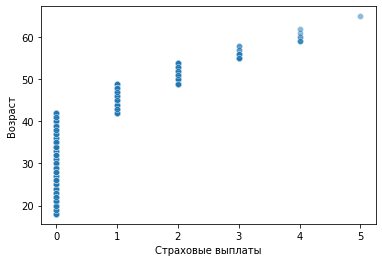

In [12]:
sns.scatterplot(x=clients['Страховые выплаты'], y=clients['Возраст'], alpha=0.5);

 - видим, что количество страховых выплат очень сильно зависит от возраста.

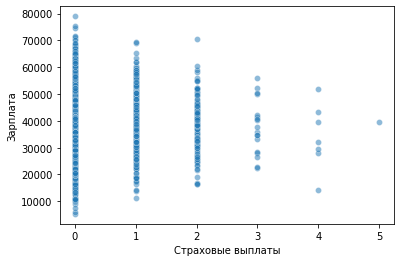

In [13]:
sns.scatterplot(x=clients['Страховые выплаты'], y=clients['Зарплата'], alpha=0.5);

In [14]:
clients.duplicated().sum()

153

- Есть дубликаты. Не будем их устранять, т.к. перед нами не стоит задача обучения прогнозирующей модели.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)**

Пусть P - обратимая матрица. Тогда, новая матрица признаков:
$$
 X' = X P
$$

Новые предсказания:

$$a' = X'w'$$

где $w'$ - решение новой задачи (с новым набором признаков - $X'$):

$$
w' = (X'^T X')^{-1} X'^T y
$$

или:

$$
w' = ((XP)^T X P)^{-1} (XP)^T y = (P^T X^T X P)^{-1} P^T X^T y = P^{-1}(X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

$(P^T)^{-1} P^T = E$ - т.к. $P$ - обратимая матрица по условию, то и $P^T$ обратимая матрица. Тогда:

$$
w' = P^{-1}\underbrace{(X^T X)^{-1} X^T y}_{w} = P^{-1} w
$$

Подставим полученный результат в формулу для новых предсказаний:
$$
a' = X P P^{-1} w = X w = a
$$

Таким образом мы доказали, что умножение матрицы признаков на обратимую матрицу не меняет предсказания модели линейной регрессии.


## Алгоритм преобразования

**Алгоритм**

 В соответствии с полученным результатом: 
 
1. Возьмем часть данных без целевого признака. 

2. Создадим случайную квадратную матрицу P соответствующего размера

3. Проверим её на обратимость. 

4. Домножим матрицу признаков (без целевого признака) на матрицу P.

5. На полученных данных можем обучать модель линейной регрессии. 

**Обоснование**

1. В разделе 2. мы показали, что предсказания модели "линейная регрессия" на данных, полученных таким способом, не изменятся.

2. Данные будут изменены. Сопоставить их напрямую с изначальными данными можно только зная матрицу P. 

## Проверка алгоритма

Получение P матрицы:

In [15]:
def get_matrix(size, state):
    rng = np.random.RandomState(state)
    p_matrix = rng.randint(100,size=(size,size))
    try:
        p_matrix_inv = np.linalg.inv(p_matrix)
        return p_matrix
    except:
        print("Случайная матрица оказалась необратимой!")
        

Разделим признаки и целевой признак; зашифруем данные:

In [16]:
target = clients['Страховые выплаты']
features = clients.drop('Страховые выплаты', axis=1)

size = features.shape[1]
state = 123

P = get_matrix(size, state)

features_encripted = pd.DataFrame(np.dot(features,P), columns=features.columns)

features_encripted.head()

,Пол,Возраст,Зарплата,Члены семьи
0,4765115.0,2333725.0,3624449.0,1591277.0
1,3651864.0,1788718.0,2777981.0,1220545.0
2,2018407.0,988653.0,1535494.0,674813.0
3,4005035.0,1961289.0,3045956.0,1336603.0
4,2507990.0,1228388.0,1907806.0,837933.0


Обучим модель линейная регрессия на исходных данных и получим метрики качества (не будем разбивать данные на обучающую и тестовую выборки, т.к. перед нами стоит задача проверки качества шифрования, а не обучения модели):

In [17]:
model = LinearRegression()
model.fit(features,target)
predict = model.predict(features)

mse = mean_squared_error(target,predict)
r2 = r2_score(target,predict)

print('Метрика MSE на исходных данных:',mse)
print('Метрика R2 на исходных данных:',r2)

Метрика MSE на исходных данных: 0.12334688941710859
Метрика R2 на исходных данных: 0.4249455028666801


Обучим эту же модель на зашифрованных данных и получим метрики качества:

In [18]:
model = LinearRegression()
model.fit(features_encripted,target)
predict_enc = model.predict(features_encripted)

mse = mean_squared_error(target,predict_enc)
r2 = r2_score(target,predict_enc)

print('Метрика MSE на зашифрованных данных:',mse)
print('Метрика R2 на зашифрованных данных:',r2)

Метрика MSE на зашифрованных данных: 0.12334688941710759
Метрика R2 на зашифрованных данных: 0.42494550286668475


**Вывод:**

 - Метрики не изменились (разница в 15-м знаке - связана с погрешностью вычислений). 
 - Алгоритм шифрования не влияет на результат.